<a href="https://colab.research.google.com/github/RaviR53/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data (1).csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#convert datatype of Date Column
gold_data[['Date']] = gold_data[['Date']].apply(pd.to_datetime)

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Top 5 highest Gold price in entire dataset

In [ ]:
data_sorted = gold_data.sort_values(by='GLD' , ascending=False)
top_5_gold_price = data_sorted.head(5)
print(top_5_gold_price)

          Date          SPX         GLD        USO        SLV   EUR/USD
795 2011-08-22  1123.819946  184.589996  32.720001  42.630001  1.436101
803 2011-09-06  1165.239990  182.899994  33.590000  41.049999  1.400325
805 2011-09-08  1185.900024  181.809998  34.459999  41.220001  1.390414
800 2011-08-30  1212.920044  179.100006  34.439999  40.400002  1.443314
807 2011-09-13  1172.869995  178.539993  34.849998  39.869999  1.368607


### Top 5 highest Gold price in which months entire dataset

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
data_sorted = gold_data.sort_values(by='GLD' , ascending=False)
top_5_gold_price = data_sorted.head(5)
top_5_gold_price['Month'] = top_5_gold_price['Date'].dt.strftime('%B - %Y')
top_5_gold_price[['Month' , 'GLD']]

<ipython-input-45-825857ae2a5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_gold_price['Month'] = top_5_gold_price['Date'].dt.strftime('%B - %Y')


,Month,GLD
795,August - 2011,184.589996
803,September - 2011,182.899994
805,September - 2011,181.809998
800,August - 2011,179.100006
807,September - 2011,178.539993


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Month'] = gold_data['Date'].dt.strftime('%B - %Y')
grouped_data = gold_data.groupby('Month')['GLD'].max().reset_index()
grouped_data_sorted = grouped_data.sort_values(by='GLD', ascending=False)
top_5_gold_prices = grouped_data_sorted.head(5)
top_5_gold_prices

,Month,GLD
14,August - 2011,184.589996
118,September - 2011,182.899994
98,November - 2011,174.979996
109,October - 2012,173.610001
35,February - 2012,173.490005


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Day'] = gold_data['Date'].dt.strftime('%d')
grouped_data = gold_data.groupby('Day')['GLD'].mean().reset_index()
grouped_data

,Day,GLD
0,01,124.103334
1,02,122.160000
2,03,121.799221
3,04,121.529719
4,05,121.889325
5,06,123.090394
6,07,123.579350
7,08,122.752531
8,09,122.467531
9,10,122.334676


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
data_sorted = gold_data.groupby(by='GLD')
top_5_gold_price = data_sorted.head(5)
top_5_gold_price['Month'] = top_5_gold_price['Date'].dt.strftime('%B - %Y')
top_5_gold_price[['Month' , 'GLD']]

,Month,GLD
0,January - 2008,84.860001
1,January - 2008,85.570000
2,January - 2008,85.129997
3,January - 2008,84.769997
4,January - 2008,86.779999
...,...,...
2285,May - 2018,124.589996
2286,May - 2018,124.330002
2287,May - 2018,125.180000
2288,May - 2018,124.489998


### Top 5 highest Gold price in which Year entire dataset

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Year'] = gold_data['Date'].dt.year
gold_data_sorted = gold_data.sort_values(by='GLD' , ascending=False)
top_5_gold_price = gold_data_sorted.head(5)
top_5_gold_price[['Year' , 'GLD']]

,Year,GLD
795,2011,184.589996
803,2011,182.899994
805,2011,181.809998
800,2011,179.100006
807,2011,178.539993


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Year'] = gold_data['Date'].dt.year
grouped_data = gold_data.groupby('Year')['GLD'].max().reset_index()
grouped_data_sorted = grouped_data.sort_values(by='GLD', ascending=False)
top_5_gold_prices = grouped_data_sorted.head(5)
print(top_5_gold_prices)

   Year         GLD
3  2011  184.589996
4  2012  173.610001
5  2013  163.669998
2  2010  139.110001
6  2014  133.100006


### 5 lowest Gold price in which month entire dataset

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
data_sorted = gold_data.sort_values(by='GLD' , ascending=True)
lowest_5_gold_price = data_sorted.head(5)
lowest_5_gold_price['Month'] = lowest_5_gold_price['Date'].dt.strftime('%B')
print(lowest_5_gold_price[['Month' , 'GLD']])

        Month        GLD
175  November  70.000000
162   October  70.650002
168  November  71.099998
167   October  71.339996
161   October  71.709999


<ipython-input-52-81d325afeb32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_5_gold_price['Month'] = lowest_5_gold_price['Date'].dt.strftime('%B')


### 5 lowest Gold price in which year entire dataset

In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data['Year'] = gold_data['Date'].dt.year
gold_data_sorted = gold_data.sort_values(by='GLD' , ascending=True)
lowest_5_gold_price = gold_data_sorted.head(5)
print(lowest_5_gold_price[['Year' , 'GLD']])

     Year        GLD
175  2008  70.000000
162  2008  70.650002
168  2008  71.099998
167  2008  71.339996
161  2008  71.709999


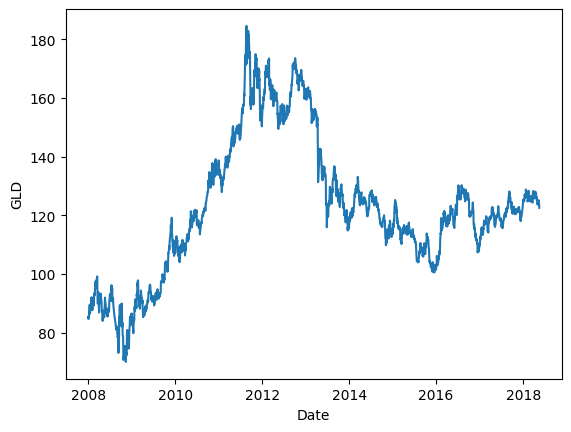

In [ ]:
#line plot date vs gold price
sns.lineplot(x='Date' , y='GLD' , data = gold_data )
plt.show()

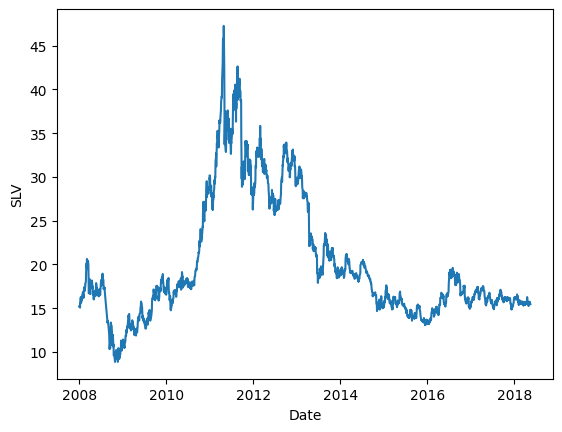

In [ ]:
#line plot date vs silver price
sns.lineplot(x='Date' , y='SLV' , data = gold_data )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

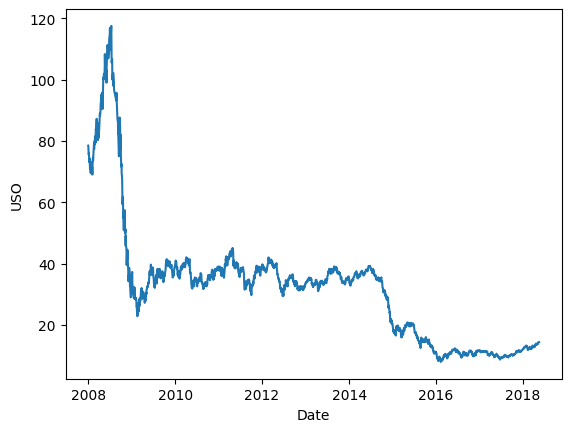

In [ ]:
#line plot date vs oil price
sns.lineplot(x='Date' , y='USO' , data = gold_data )
plt.show

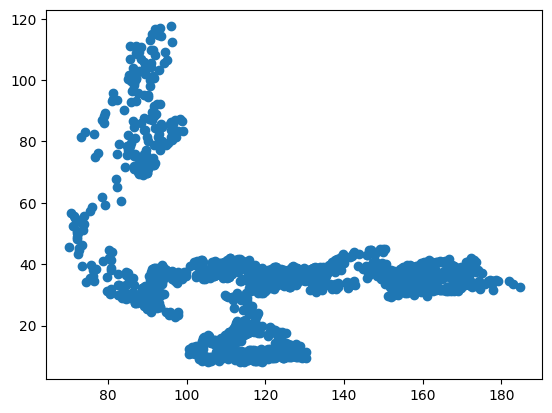

In [ ]:
#scatterplot of gold price vs USD
plt.scatter(x='GLD' , y='USO' , data = gold_data )
plt.show()

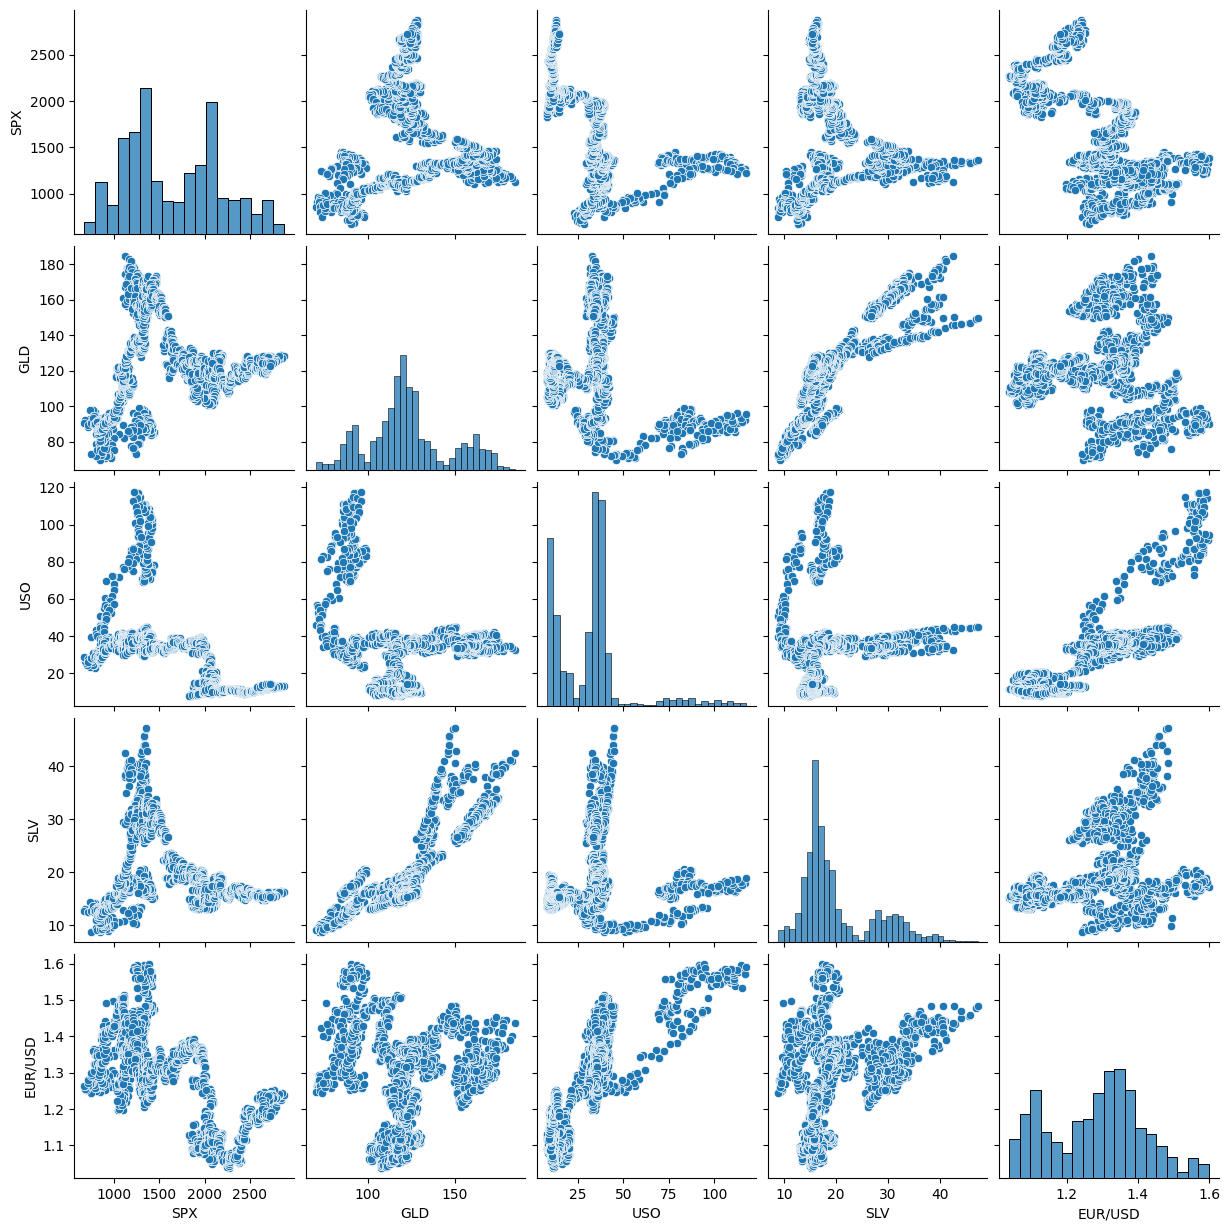

In [ ]:
#pairplot of dataset
sns.pairplot(gold_data.iloc[ :,1:6])
plt.show()

### Correlation:

- Positive Correlation
- Negative Correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-59-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

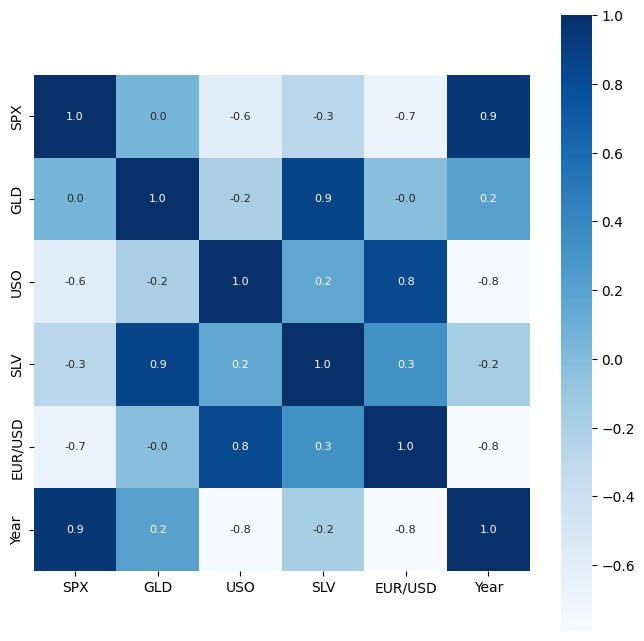

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Name: GLD, dtype: float64


<ipython-input-62-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

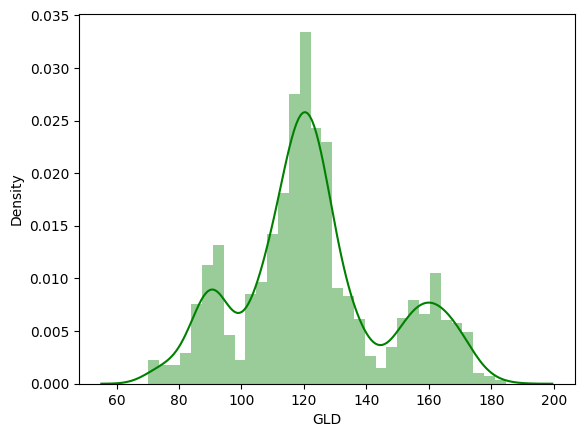

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

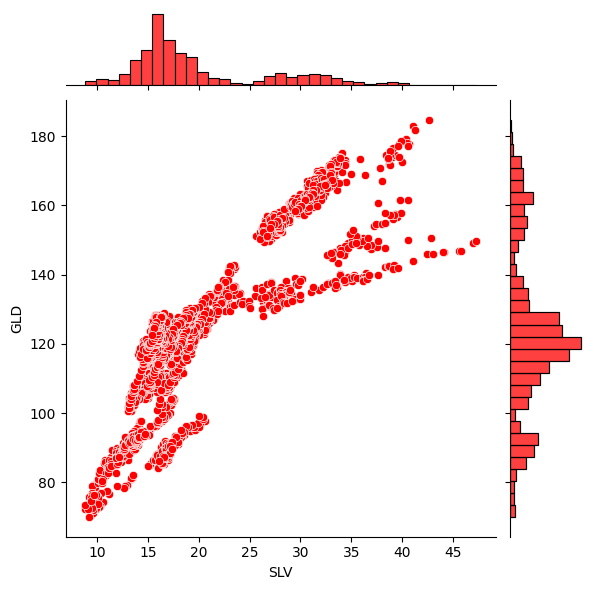

In [ ]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SLV'], y = gold_data['GLD'], color = 'red')

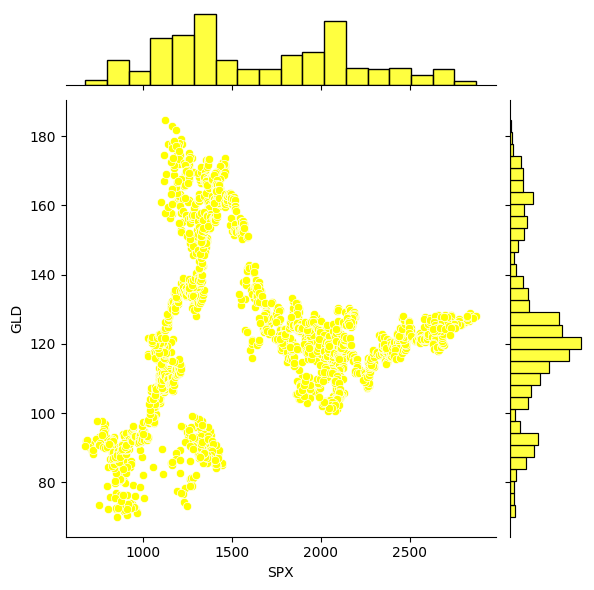

In [ ]:
#Now we check the relation with GLD variable
sns.jointplot(x =gold_data['SPX'], y = gold_data['GLD'], color = 'yellow')

#### Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD           Month Day  Year
0     1447.160034  78.470001  15.1800  1.471692  January - 2008  02  2008
1     1447.160034  78.370003  15.2850  1.474491  January - 2008  03  2008
2     1411.630005  77.309998  15.1670  1.475492  January - 2008  04  2008
3     1416.180054  75.500000  15.0530  1.468299  January - 2008  07  2008
4     1390.189941  76.059998  15.5900  1.557099  January - 2008  08  2008
...           ...        ...      ...       ...             ...  ..   ...
2285  2671.919922  14.060000  15.5100  1.186789      May - 2018  08  2018
2286  2697.790039  14.370000  15.5300  1.184722      May - 2018  09  2018
2287  2723.070068  14.410000  15.7400  1.191753      May - 2018  10  2018
2288  2730.129883  14.380000  15.5600  1.193118      May - 2018  14  2018
2289  2725.780029  14.405800  15.4542  1.182033      May - 2018  16  2018

[2290 rows x 7 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

### Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(X_train,Y_train)

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.56249939  81.78400005 115.97330032 127.58070073 120.62260143
 154.66539837 150.47399866 126.13780041 117.49279889 125.95450058
 116.719101   172.70790115 141.85739858 167.63349793 115.35180033
 117.2917005  137.79020325 169.91130032 158.62870206 159.21829884
 155.13150028 125.46020046 176.00279963 157.39650393 125.27420006
  93.91099993  77.23500013 120.25840012 119.13979939 167.50709946
  88.1570005  125.34170007  91.26230066 117.88510016 121.16209884
 136.25250037 115.36240153 115.52740069 148.06489996 107.27190095
 104.2013024   87.33729824 126.63180024 118.01420043 154.45479891
 119.53000046 108.32270031 108.07009809  93.31830059 126.99809817
  75.36490003 113.66839918 121.31890032 111.37839906 118.84019883
 120.73639925 159.4750001  167.30310135 146.93939663  85.85979876
  94.19150052  86.92249902  90.59410033 118.97010098 126.48940081
 127.58330025 169.22610006 122.34319931 117.34879885  98.31490016
 168.13050114 142.92189841 132.09900226 121.16280228 120.5474997
 119.718000

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893835120475319


In [ ]:
Y_test = list(Y_test)

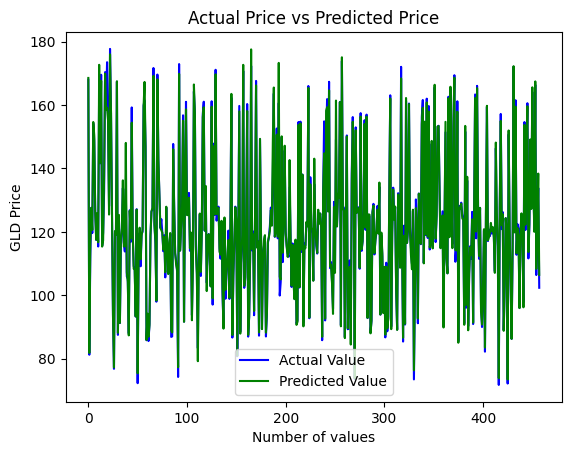

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()